[1.         0.36787944 0.01831564]


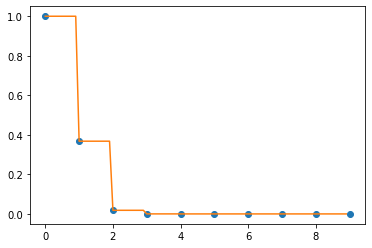

In [43]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np

x = np.arange(0, 10)
y = np.exp(-x**2.0)
f = interpolate.interp1d(x, y,kind='previous')

xnew = np.arange(0, 9, 0.1)

print(f(np.arange(0,2.1)))

#print(type(xnew))

ynew = f(xnew)   # use interpolation function returned by `interp1d`

#plt.plot(x, y, 'o', x, f, '-')

plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

In [44]:
in_folder = 'data_test/한강/퇴적물/'
out_folder = 'data_test/한강1/퇴적물/'

file_names = [
    ['대성리_2016.xlsx','대성리_2017.xlsx','대성리_2018.xlsx', '대성리_2019.xlsx'],
             ]



for loc in range(len(file_names)):
    df_loc = []
    print(len(file_names[loc]))
    for y in range(len(file_names[loc])):
        path = os.path.join(in_folder, file_names[loc][y])
        print(file_names[loc][y])
        df_loc.append(pd.read_excel(path))
        
    df_loc = pd.concat(df_loc)

    df_loc2 = df_loc.drop([0])
    
    date_col = df_loc.columns[0]
    df_loc[date_col] = pd.to_datetime(df_loc[date_col])
    df_loc = df_loc[df_loc[date_col].notna()]

    year = pd.DatetimeIndex(df_loc[date_col]).year.astype(np.int64)
    start = str(year[0]) + "-01-01 00:00"
    end = str(year[-1]) + "-12-31 23:00"
    
    time_series = pd.date_range(start = start, end = end, freq='H')
    time_series = pd.DataFrame(time_series)
    time_series.columns = [date_col]
    
        
    
    

    df_loc = pd.concat([time_series, df_loc], axis=0)
    df_loc = df_loc.drop_duplicates([date_col], keep="last")
    df_loc = df_loc.sort_values([date_col], axis=0)
    
    df_loc = df_loc.interpolate(method='polynomial', order=3, limit_direction='both')
    
    df_loc2[date_col] = pd.to_datetime(df_loc2[date_col])
    df_loc2 = df_loc2[df_loc2[date_col].notna()]
    
    df_loc2 = pd.concat([time_series, df_loc2], axis=0)
    df_loc2 = df_loc2.drop_duplicates([date_col], keep="last")
    df_loc2 = df_loc2.sort_values([date_col], axis=0)
    
    df_loc2 = df_loc2.interpolate(method='polynomial', order=3, limit_direction='both')
    
#    df_loc.to_excel(out_folder+'대성리_1619.xlsx', index = False)

    #print(df_loc.columns)
    n = 0
    for colum in df_loc.columns[10:]:
        
        if df_loc[colum].dtype == np.float64:
            plt.figure()
            df = df_loc[colum]
            plt.title(colum)
            plt.plot(range(35064),df_loc[colum],label='1', marker='.', zorder=-10, c='#2ca02c')
            plt.plot(range(35064),df_loc2[colum],label='2', marker='.', zorder=-10, c='#ff7f0e')
            plt.show()
        


4
대성리_2016.xlsx
대성리_2017.xlsx
대성리_2018.xlsx
대성리_2019.xlsx


ValueError: Expect x to not have duplicates